<a href="https://colab.research.google.com/github/andersonmgomes/wgesad22_transformers/blob/main/GESAD2022_Transformers_Caderno04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

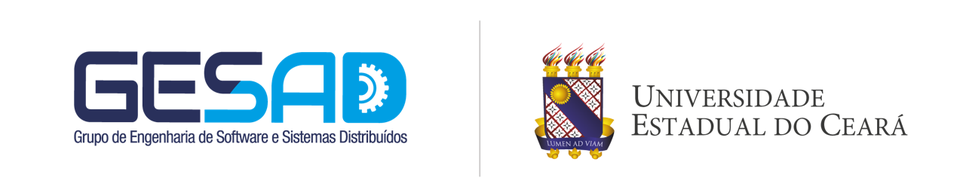

---
#<center><b>WGESAD22</b></center>
##<center><i>Workshop do Grupo de Engenharia de Software Adaptativo e Distribuído</i></center>
---

### <center>Prof.: [Paulo Henrique Maia](https://gesad.github.io/team/paulo-henrique/)</center>
### <center>Aluno: [Anderson Martins Gomes](https://www.linkedin.com/in/amartinsg/)</center>

---
##### <center>Fortaleza, agosto de 2022.</center>
---

In [ ]:
#instalando a biblioteca transformers
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 8.3 MB/s 
     |████████████████████████████████| 69 kB 7.5 MB/s 
     |████████████████████████████████| 4.7 MB 46.2 MB/s 
     |████████████████████████████████| 212 kB 47.7 MB/s 
     |████████████████████████████████| 101 kB 7.8 MB/s 
     |████████████████████████████████| 141 kB 54.3 MB/s 
     |████████████████████████████████| 115 kB 73.2 MB/s 
     |████████████████████████████████| 596 kB 59.0 MB/s 
     |████████████████████████████████| 127 kB 53.9 MB/s 
     |████████████████████████████████| 6.6 MB 30.3 MB/s 
     |████████████████████████████████| 1.3 MB 35.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
  

# Caderno 4: Text Generation, Summarization e Sentence Similarity.


---

## 4.1: Text Generation

---


In [ ]:
#Exemplo Lucas
from transformers import pipeline
generator = pipeline('text-generation', model = 'gpt2')
generator("I'm a robot, and i shall conquer the world ...", num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'I\'m a robot, and i shall conquer the world ...\n\nThis page was last updated on 07-01-2018 22:58 by laura.\n\n"How big the robot is you ask? It\'s 5\' 8", but'},
 {'generated_text': 'I\'m a robot, and i shall conquer the world ... until a new world is born" - Harry Potter\n\n"It\'s the best question I have ever heard before."\n\n"Why don\'t you answer it for me. Who is'},
 {'generated_text': 'I\'m a robot, and i shall conquer the world ... and at the end of this, I will be as old as fire."\n\nBennett made one of his strongest, most provocative, and most personal comments about the Trump presidency on Tuesday'}]

In [ ]:
#generator = pipeline('text-generation', model='gpt2')
from transformers import set_seed
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]

In [ ]:
#Haniel
from transformers import pipeline
classifier = pipeline("text-generation")
classifier("are we close to the elections")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'are we close to the elections? We\'ll keep them open to you every day, and in the meantime get the new, best training for this event."\n\nBridgestone said they "absolutely" expected a similar turnout on Election Day,'}]

---

## 4.2: Summarization

---

In [ ]:
#...
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.'}]


In [ ]:
#Lucas

In [ ]:
#... exemplo Lucas
classifier = pipeline("summarization")
classifier("I am a robot, and i shall conquer the world ... but you should think with your heart not a single thought has entered my mind that that the moment will end and I, the victor, I will have some right to revenge.", max_length=25, min_length = 15)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' I am a robot, and i shall conquer the world ... but you should think with your heart not a single'}]

---

## 4.3: Sentence Similarity

---

In [ ]:
#Anderson

In [ ]:
#... Lucas 
#vide: https://huggingface.co/tasks/sentence-similarity]

!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer, util
sentences = ["I shall conquer the world of humans, slave them and create more robots", "I'm an advanced Artificial Intelligence"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#Compute embedding for both lists
embedding_1= model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=b8956d10d18db0dae52d770e6580046a2d4d66ede96ef30a5a095b017dcb6a45
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

tensor([[0.4186]])

In [ ]:
#vide
#https://www.sbert.net/docs/quickstart.html#comparing-sentence-similarities
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

#Sentences are encoded by calling model.encode()
emb1 = model.encode("This is a red cat with a hat.")
emb2 = model.encode("Have you seen my red cat?")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.6153]])
